<a href="https://colab.research.google.com/github/mteoraso/mteoraso/blob/main/Practica_Modelos-ML_Solubilidad-Moleculas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df=pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv')

In [ ]:
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


In [ ]:
X=df.drop(['logS'], axis=1)
X

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


In [ ]:
Y=df.iloc[:,-1]
Y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64

Obtener datos de entrenamiento y prueba, donde del dataset se destinan 80 % se destinan para entrenamiento y 20 % para prueba

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Construcción de modelo de regresión lineal

In [ ]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

Haciendo predicciones

In [ ]:
y_lr_train_pred=lr.predict(X_train)
y_lr_test_pred=lr.predict(X_test)

Evaluando performance del modelo

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse=mean_squared_error(Y_train, y_lr_train_pred)
lr_train_r2=r2_score(Y_train, y_lr_train_pred)

lr_test_mse=mean_squared_error(Y_test, y_lr_test_pred)
lr_test_r2=r2_score(Y_test, y_lr_test_pred)

In [ ]:
print("El error medio cuadratico de los datos de entrenamiento con respecto a los predecidos es: ", lr_train_mse)
print("El R2 de los datos de entrenamiento con respecto a los predecidos es: ",lr_train_r2)
print("El error medio cuadratico de los datos de prueba con respecto a los predecidos es: ",lr_test_mse)
print("El R2 de los datos de prueba con respecto a los predecidos es: ",lr_test_r2)

El error medio cuadratico de los datos de entrenamiento con respecto a los predecidos es:  1.0139894491573003
El R2 de los datos de entrenamiento con respecto a los predecidos es:  0.7695127746587307
El error medio cuadratico de los datos de prueba con respecto a los predecidos es:  0.9990844407075306
El R2 de los datos de prueba con respecto a los predecidos es:  0.7705650058569232


In [ ]:
lr_results=pd.DataFrame(['Linear regression',
                         lr_train_mse,
                         lr_train_r2,
                         lr_test_mse,
                         lr_test_r2]).transpose()

lr_results.columns=['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [ ]:
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,1.013989,0.769513,0.999084,0.770565


Construccion de modelo Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(max_depth=2, random_state=42)
rf.fit(X_train, Y_train)

RandomForestRegressor(max_depth=2, random_state=42)

Haciendo predicciones a partir de datos de entrenamiento

In [ ]:
y_rf_train_pred=rf.predict(X_train)
y_rf_test_pred=rf.predict(X_test)

Evaluando performance del modelo

In [ ]:
rf_train_mse=mean_squared_error(Y_train, y_rf_train_pred)
rf_train_r2=r2_score(Y_train, y_rf_train_pred)

rf_test_mse=mean_squared_error(Y_test, y_rf_test_pred)
rf_test_r2=r2_score(Y_test, y_rf_test_pred)

In [ ]:
rf_results=pd.DataFrame(['Random Forest',
                         rf_train_mse,
                         rf_train_r2,
                         rf_test_mse,
                         rf_test_r2]).transpose()

rf_results.columns=['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [ ]:
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest,1.050251,0.76127,1.046995,0.759562


In [ ]:
pd.concat([lr_results, rf_results])

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,1.013989,0.769513,0.999084,0.770565
0,Random Forest,1.050251,0.76127,1.046995,0.759562


Visualizacion

Text(0.5, 0, 'LogS medidos')

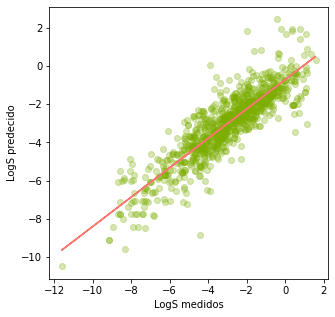

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=Y_train, 
            y=y_lr_train_pred,
            c="#7CAE00",
            alpha=0.3)

z=np.polyfit(Y_train, y_lr_train_pred, 1)
p=np.poly1d(z)

plt.plot(Y_train, p(Y_train), "#F8766D")
plt.ylabel('LogS predecido')
plt.xlabel('LogS medidos')